<a href="https://colab.research.google.com/github/fatimasr68/DNN/blob/master/dnnwsp_result_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion prediction using a deep neural network (DNN) with weight sparsity control scheme**

This code is to investigate the results of the DNN with weight sparsity control for the prediction of emotion responses using the provided sample data. It is important to check learning curves of the prediction performance obtained from training and test data so that we can justify whether the DNN model properly works or not. In addition, it is necessary to explore the convergence of target sparsity levels in each hidden layer. Here, the optimal **sparsity levels** of the 1st, 2nd, and 3rd hidden layers were set as **0.7**, **0.5**, **0.3**.


In [0]:
import matplotlib.pyplot as plt
import numpy as np  # Simplification
import scipy.io as sio
from scipy import stats

# save_path = '/users/khc/code/demo_18aug22'

# save_name = '%s/rst_vlnc_predcition.mat' % (save_path)  # a directory to save dnnwsp result 

save_name = '/content/drive/My Drive/Colab Notebooks/Results/rst_vlnc_predcition.mat' # a directory to save dnnwsp result  
datainfo = sio.loadmat(save_name) 

n_epochs = datainfo['epch'][0][0]

# load estimated/predicted emotion responses during training 
pct_trvld = datainfo['pct_trvld'] 
pct_tst   = datainfo['pct_tst']
 
train_y = datainfo['train_y']
test_y  = datainfo['test_y']


# load estimated errors during training 
trvld_err = datainfo['trvld_err']
ts_err = datainfo['ts_err']


# sparsity level of each hidden layer
hsply1 = datainfo['hsply1']  # sparsity level estimated from weights between the input and the 1st hidden layer 
hsply2 = datainfo['hsply2']  # sparsity level estimated from weights between the 1st and 2nd hidden layer 
hsply3 = datainfo['hsply3']  # sparsity level estimated from weights between the 2nd and 3rd hidden layer 



# Calculate the correlation coefficients over epochs 
tr_cc = np.zeros((n_epochs))
ts_cc = np.zeros((n_epochs))


for ii in range(n_epochs - 1):
    tr_r = np.corrcoef(pct_trvld[ii, :], train_y)
    ts_r = np.corrcoef(pct_tst[ii, :], test_y)
    tr_cc[ii] = tr_r[1, 0]
    ts_cc[ii] = ts_r[1, 0]


In [0]:
print(test_y.shape)

# Predicted y for train and test
print(pct_trvld.shape)
print(pct_tst.shape)

#print(pct_tst[n_epochs-1])


(1, 16)
(500, 64)
(500, 16)


# **Plots of the DNN results**

## **Errors**



MAE for Train: 0.01

MAE for Test: 0.10


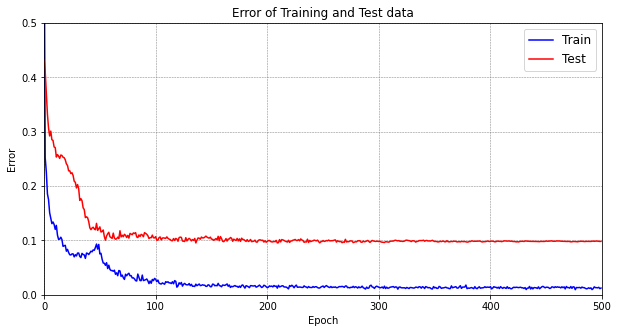

In [0]:
## Plotting DNNP results
print('\nMAE for Train: %.2f' % trvld_err[-1])
print('\nMAE for Test: %.2f' % ts_err[-1])
t1 = np.arange(0, n_epochs, 1)

# Training/test learning curves of the error
plt.figure(1, figsize= (10, 5))
plt.plot(t1, trvld_err, 'b', label = 'Train')
plt.plot(t1, ts_err, 'r', label = 'Test')
plt.axis([0, n_epochs, 0, 0.5])
plt.grid(color='gray', ls = '--', lw = 0.5)

plt.title('Error of Training and Test data')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='best', fontsize='large')
plt.show()


## **Correlation Coefficient**

CC for Train: 1.00
CC fot Test:  0.62




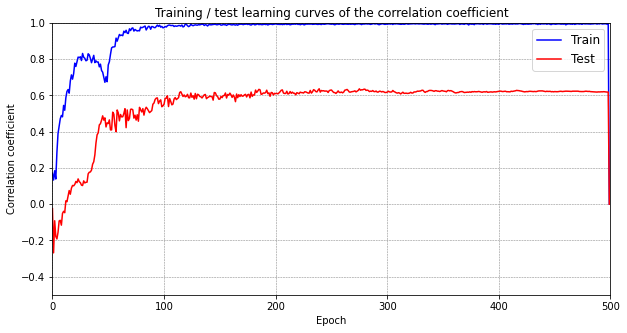

In [0]:
# Training/test learning curves of the correlation coefficients

plt.figure(2, figsize=(10, 5))

plt.plot(t1, tr_cc.flatten(), 'b', label ='Train')
plt.plot(t1, ts_cc.flatten(), 'r', label ='Test' )
plt.axis([0, n_epochs, -0.5, 1])
plt.grid(color='gray', ls = '--', lw = 0.5)

plt.title('Training / test learning curves of the correlation coefficient')
plt.xlabel('Epoch')
plt.ylabel('Correlation coefficient')
plt.legend(loc='best', fontsize='large')

print('CC for Train: %.2f' % tr_cc[n_epochs-2])  
print('CC fot Test:  %.2f' % ts_cc[n_epochs-2])
print('\n')

plt.show()


## **Sparsity Level**

Our **target sparsity levels** are set as **0.7**, **0.5**, **0.3** for the 1st, 2nd, and 3rd hidden layers. The sparsity levels are converged to the target sparsity levels of each hidden layer.

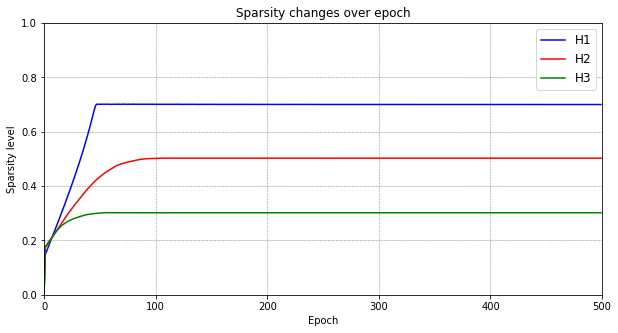

In [0]:
# Sparsity changes over epoch
plt.figure(3, figsize=(10, 5))
plt.plot(t1, np.mean(hsply1[t1, :], axis=1), 'b' , label ='H1')    # hidden layer 1
plt.plot(t1, np.mean(hsply2[t1, :], axis=1), '-r', label ='H2')    # hidden layer 2
plt.plot(t1, np.mean(hsply3[t1, :], axis=1), '-g', label ='H3')    # hidden layer 3

plt.axis([0, n_epochs, 0, 1])
plt.xlim = [0, n_epochs]
plt.yticks = ((0, 0.3, 0.5, 0.7, 0.9, 1))
plt.grid(color='gray', ls = '--', lw = 0.5)

plt.title('Sparsity changes over epoch')
plt.xlabel('Epoch')
plt.ylabel('Sparsity level')
plt.legend(loc= 'best', fontsize= 'large')
plt.show()


## **Plot Predicted Patterns**

The following code is to check patterns of the estimated emotion response from training and test data.


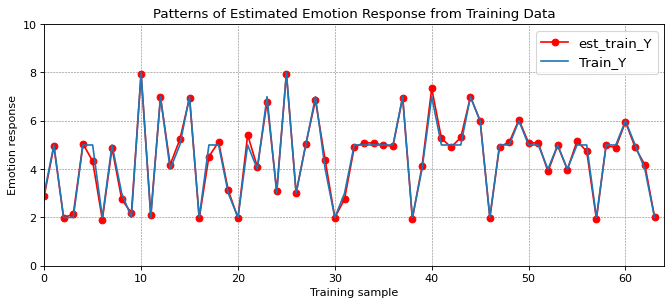

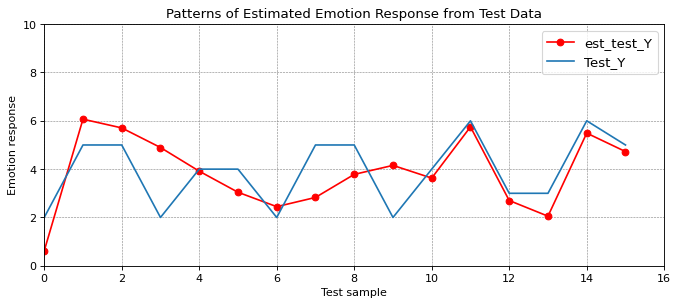

In [0]:
# Plotting of emotion responses and estimated responses obtained from training data

plt.figure(4, figsize= (10, 4), dpi= 80)

t2 = np.arange(0, pct_trvld.shape[1], 1)

pct_train_y = pct_trvld[n_epochs - 1, :].flatten()

plt.plot(t2, pct_train_y*10, '-or', label= 'est_train_Y')
plt.plot(t2, train_y.flatten()*10, '-', label= 'Train_Y')
plt.axis([0, pct_trvld.shape[1], 0, 10])
plt.grid(color='gray', ls = '--', lw = 0.5)

plt.title('Patterns of Estimated Emotion Response from Training Data')
plt.xlabel('Training sample')
plt.ylabel('Emotion response')
plt.legend(loc='best', fontsize='large')

plt.figure(5, figsize=(10, 4), dpi= 80)

t3 = np.arange(0, pct_tst.shape[1], 1)
pct_test_y = pct_tst[n_epochs-1, :].flatten()

plt.plot(t3, pct_test_y*10, '-or', label= 'est_test_Y')
plt.plot(t3, test_y.flatten()*10, '-', label= 'Test_Y')
plt.axis([0, pct_tst.shape[1], 0, 10])
plt.grid(color='gray', ls = '--', lw = 0.5)


plt.title('Patterns of Estimated Emotion Response from Test Data')
plt.xlabel('Test sample')
plt.ylabel('Emotion response')
plt.legend(loc= 'best', fontsize= 'large')

plt.show()


# **ANOVA**


In [0]:
train_pred =np.reshape(pct_trvld[n_epochs-1], (64, 1)) 
train_y = train_y.reshape(64, 1)

y_pred = np.reshape(pct_tst[n_epochs-1], (16, 1))
test_y = test_y.reshape(16, 1)


print('\n--------------- Train --------------------')

f_val2, p_val2 = stats.f_oneway(train_pred, train_y)
print( "ANOVA results:\nF-test= ", f_val2, ",\nP-value= ", p_val2) 


print('\n--------------- Test --------------------')

f_val, p_val = stats.f_oneway(y_pred, test_y)
print( "ANOVA results:\nF-test= ", f_val, ",\nP-value= ", p_val)  


--------------- Train --------------------
ANOVA results:
F-test=  [0.00014259] ,
P-value=  [0.99049141]

--------------- Test --------------------
ANOVA results:
F-test=  [0.01994515] ,
P-value=  [0.88863447]


# **T-test**

In [0]:
train_pred =np.reshape(pct_trvld[n_epochs-1], (64, 1)) 
train_y = train_y.reshape(64, 1)

y_pred = np.reshape(pct_tst[n_epochs-1], (16, 1))
test_y = test_y.reshape(16, 1)


print('\n--------------- Train --------------------')

f_val, p_val = stats.ttest_rel(train_pred, train_y)
print( "t-test results:\nF-test= ", f_val, ",\nP-value= ", p_val) 


print('\n--------------- Test --------------------')

f_val2, p_val2 = stats.ttest_rel(y_pred, test_y)
print( "t-test results:\nF-test= ", f_val2, ",\nP-value= ", p_val2)  


--------------- Train --------------------
t-test results:
F-test=  [0.1568407] ,
P-value=  [0.87587195]

--------------- Test --------------------
t-test results:
F-test=  [-0.22846205] ,
P-value=  [0.8223724]


Deep neural network (DNN) with weight sparsity control (DNN-WSP; i.e., L1-norm regularization) improved the classification performance using whole-brain resting-state functional connectivity patterns of schizophrenia patient and healthy groups. Also, initializing DNN's weights through stacked auto-encoder enhanced the classification performance (Jang et al., Neuroimage 2017, Kim et al., Neuroimage, 2016). 


The DNN code is for regression anlaysis to predict emotional responses (i.e., scores) from whole-brain fMRI data. 
The Python codes were modified from the DeepLearningTutorials (https://github.com/lisa-lab/DeepLearningTutorials) 
to apply a node-wise and layer-wise control of weight sparsity via Hoyer sparseness (Kim and Lee, PRNI2016 & ICASSP2017).


dnnwsp_hsp_denoise.py: a code for a DNN model with weight sparsity control 

dnnwsp_reg_h3_wt_denoising.ipynb: detailed information about the code for a DNN model with weight sparsity control 

dnnwsp_rst_check.ipynb: a code to investigate the results obtained from the DNN with weight sparsity control

emt_valence_sample.mat: sample data

=================== emt_sample_data.mat ======================
##### train_x  = 64 volumes x 55417 voxels  
##### train_y  = 64 volumes x 1 [valence, arousal or dominance scores for training]
##### test_x  = 16 volumes x 55417 voxels
##### test_y  = 16 volumes x 1 [valence, arousal or dominance scores for test]

=============================================================

###### rst_vlnc_predcition.mat: results obtained from the DNN with weight sparsity control